# Modeling

To find the best model, firstly we will try to simplify our problem. In this notebook, different modeling techniques are compaired. We will use different encoder, scaler.  




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modeling

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 4.1 MB/s 


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.5 MB/s 
     |████████████████████████████████| 160 kB 12.0 MB/s 
     |████████████████████████████████| 193.7 MB 29 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=3ec24a17f9a46ac220565b3b952f5c1a359a6f5c2d4fa5b47bdef45194670723
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
import sklearn
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import gc; gc.enable()

from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#define train and test 
train_set = pd.read_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_df_train.csv')
test_set =  pd.read_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_df_test.csv')

In [ ]:
df = train_set.copy()
df.head()

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,69572,functional,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,...,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,8776,functional,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,...,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,34310,functional,other,world vision,-3.82,Pangani,21,1,gravity,gravity,...,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,67743,non functional,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,...,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,19728,functional,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,...,31.13,1,Other,1329,529,16,long dry,1,Kagera-1,other


In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [ ]:
df.shape

(59399, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59399 entries, 0 to 59398
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  int64  
 2   funder                 59399 non-null  object 
 3   installer              59399 non-null  object 
 4   latitude               59399 non-null  float64
 5   basin                  59399 non-null  object 
 6   region_code            59399 non-null  int64  
 7   public_meeting         59399 non-null  int64  
 8   extraction_type        59399 non-null  object 
 9   extraction_type_class  59399 non-null  object 
 10  payment_type           59399 non-null  object 
 11  water_quality          59399 non-null  object 
 12  quantity               59399 non-null  object 
 13  source                 59399 non-null  object 
 14  waterpoint_type        59399 non-null  object 
 15  lo

In [ ]:
# we dropped some columns for now, because we have categorized versions of them
df.drop(columns=['id',],inplace=True )

In [ ]:
df1 = df.copy() # to protect original df , take the copy of it

Now, we need to use scaler for numeric columns and encoder for categorical columns. So, we divided columns in two.

In [ ]:
X = df1.drop(['status_group'], axis=1,)
X.head()

,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,water_quality,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,annually,soft,...,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,never pay,soft,...,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,other,world vision,-3.82,Pangani,21,1,gravity,gravity,per bucket,soft,...,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,never pay,soft,...,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,never pay,soft,...,31.13,1,Other,1329,529,16,long dry,1,Kagera-1,other


Now, we need to use scaler for numeric columns and encoder for categorical columns. So, we divided columns in two.

In [ ]:
cat_col = [cname for cname in X .columns if
                   X [cname].dtype == "object"]

cat_col

['funder',
 'installer',
 'basin',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'scheme_management',
 'season',
 'region_district',
 'authority_scheme']

In [ ]:
num_col = ['gps_height','longitude','latitude','population','public_meeting','age','permit','amount_tsh_missing','region_code',]

In [ ]:
#2:'latitude',1:'longitude',5:'age',0:'gps_height',3'population',8:'region_code',7'amount_tsh_missing',6:'permit',4:'public_meeting'


In [ ]:
df1['status_group'].value_counts()

0    32259
2    22823
1     4317
Name: status_group, dtype: int64

0 = functional water points ,

1 = functional but needs repair water points,

2 = non-functinal water points

We collect functional and functional but needs help target together and make them 1, non-functional is 0.

In [ ]:
target='status_group' #assign out target column as target

## Making Pipeline / Baseline

In [ ]:
# Dividing X and target 

used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [ ]:
used_cols

['funder',
 'installer',
 'latitude',
 'basin',
 'region_code',
 'public_meeting',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'longitude',
 'permit',
 'scheme_management',
 'gps_height',
 'population',
 'age',
 'season',
 'amount_tsh_missing',
 'region_district',
 'authority_scheme']

##split

In [ ]:
X = df1.drop(['status_group'], axis=1)
y = df1['status_group']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

#Custom  function

In [ ]:
def confusion_matrix_plotter (y_test,y_pred):
  fig, ax = plt.subplots(figsize=(8,5)) 
  data = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
  ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
  ax.set_xlabel("Predicted")
  ax.set_ylabel ("Actual")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_yticklabels(ax.get_xticklabels(), rotation=0)

In [ ]:
def feature_importances (model, title):
  features= X_train.columns
  importances = np.round(model.feature_importances_,3) 
  indices = np.argsort(importances)
  num_features = len(features)
  fig, ax = plt.subplots(figsize=(10,10)) 
  plt.barh(range(num_features), importances[indices[-num_features:]],  align='center', color =  '#66c2a5')
  plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
  plt.xlabel('Relative Importance')
  plt.title('Feature Importance'+ title)
plt.show()

In [ ]:
# referd from https://github.com/scikit-learn/scikit-learn/issues/12720

# this function can lable encode multiple columns at once where sklearns label encoder only encode one column at a time and we can not use it in pipeline 

from sklearn.base import BaseEstimator, TransformerMixin

class My_LabelEncoder(BaseEstimator, TransformerMixin):
    def fit( self , df ,df_y  ):
      maps_={}
      for col in df:
        y = df[col]
        uni = np.unique(y)
        map_ = {}
        for c in uni:
            map_[c] = len(map_)
        maps_[col] = map_
      self.maps_ = maps_
      return self


    def transform(self , df):
      ndf = df.copy()
      for col in df:
        ny = []
        map_= self.maps_[col]
        for c in np.array(df[col]):
          if c in self.maps_[col]:
            ny.append(self.maps_[col][c])
          else:
            ny.append(-1)
        ndf[col] = ny
      return ndf

##Balanced Accuracy formula
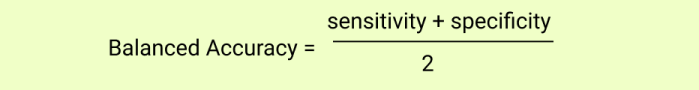


###Balanced accuracy formula

###Sensitivity: This is also known as true positive rate or recall, it measures the proportion of real positives that are correctly predicted out of total positive prediction made by the model.

##Sensitivity= TP / (TP + FN)

###Specificity: Also known as true negative rate, it measures the proportion of correctly identified negatives over the total negative prediction made by the model.

##Specificity =TN / (TN + FP)

#Model Overview

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

X_encoded = pd.DataFrame(preprocessor.fit_transform(X,y))

In [ ]:
X_encoded

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.540188,-0.064513,-1.410019,-0.447618,0.304989,-0.313297,-1.530574,-1.531127,-0.244324,108.0,...,0.0,0.0,6.0,1.0,8.0,1.0,7.0,1.0,20.0,1.0
1,0.556962,-0.157523,1.207065,-0.091267,0.304989,-1.192349,0.653350,0.653114,0.267406,44.0,...,0.0,2.0,6.0,2.0,5.0,1.0,2.0,1.0,55.0,2.0
2,-0.771911,0.912100,0.640200,-0.153785,0.304989,-1.094677,0.653350,-1.531127,0.324265,96.0,...,0.0,5.0,6.0,1.0,0.0,2.0,7.0,2.0,52.0,1.0
3,-1.560289,1.311270,-1.851291,-0.553899,0.304989,1.151790,0.653350,0.653114,4.247527,136.0,...,5.0,2.0,6.0,0.0,3.0,2.0,7.0,2.0,76.0,1.0
4,0.426498,-1.541057,1.315686,0.427631,0.304989,0.077393,0.653350,0.653114,0.153688,96.0,...,0.0,2.0,6.0,3.0,5.0,1.0,2.0,0.0,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,0.204708,0.799712,0.833681,-0.414275,0.304989,-0.117952,0.653350,-1.531127,-0.699195,41.0,...,0.0,5.0,6.0,1.0,8.0,1.0,10.0,1.0,38.0,0.0
59395,0.208436,0.055626,-1.141861,-0.558066,0.304989,-0.020280,0.653350,-1.531127,-0.244324,96.0,...,0.0,0.0,6.0,1.0,6.0,1.0,7.0,1.0,19.0,1.0
59396,-0.132635,-0.421054,-1.033240,-0.220470,0.304989,-0.020280,-1.530574,0.653114,-0.187465,96.0,...,1.0,1.0,1.0,1.0,3.0,4.0,7.0,1.0,65.0,1.0
59397,-0.132635,0.292028,-0.228767,-0.220470,0.304989,-0.313297,0.653350,0.653114,-0.812913,96.0,...,1.0,2.0,6.0,2.0,7.0,4.0,7.0,1.0,12.0,1.0


In [ ]:
#define the models
models=[LogisticRegression(max_iter = 1000000,  random_state=42),
        KNeighborsClassifier(),
        DecisionTreeClassifier( random_state=42),
       RandomForestClassifier( random_state=42),
       XGBClassifier( random_state=42),
        BaggingClassifier( random_state=42), 
        AdaBoostClassifier( random_state=42),
        GradientBoostingClassifier( random_state=42),
       CatBoostClassifier( random_state=42)]

#create a list of model names
names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Catboost Classifier']

#create empty lists for the accuracy and standard deviation
accuracy=[]
std = []

#peform 10-fold cross validaton on each model and append the results to the list
for model in models:
  cv = KFold(n_splits=10, shuffle = True,  random_state=1)
  n_scores = cross_val_score(model, X_encoded, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
  mean_score = np.mean(n_scores)
  std_score = np.std(n_scores)
  accuracy.append(mean_score)
  std.append(std_score)

#create a dataframe of the model performances
d = {'Model':names,'Accuracy':accuracy, 'Std':std}   
score_df = pd.DataFrame(d)
score_df

NameError: ignored

#No scaling / Label Encoder

In [ ]:
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier(criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=400)

encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder

cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 

0.6407014331557788 +/- 0.0036005051944368103


#Baseline - Robust Scaler/ Target Encoder with Random Forest

To scale numeric values and encode categorical columns, we will make pipeline and also use it in our model and classifier changes. For the first trial we use Robust Scaler as a scaler. Robust scales variables using statistics that are strong to outliers. Robust Scaler use IQR(Interquartile Range). value = (value – median) / (p75 – p25). As a encoder, we will try target encoder which works well with higher cardinality features. Our data has higher unique values also. 
Our first trial for baseline is Random Forest as it performed well compaired to other classes. we are taking hyperparameter tuned random forest here that

We will create empty dataframe to write our results on it to keep when parameters changed.

In [ ]:
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'balanced_accuracy score mean', 'balanced_accuracy score std']) # to see all results

Accuracy score train: 0.9876260022306866
Accuracy score test: 0.8053872053872054
----------
micro avg score train: 0.9876260022306866
micro avg score test: 0.8053872053872053
----------
macro avg score train: 0.9775388125787559
macro score test: 0.6842827908131776
----------
Balance Accuracy score train: 0.973149962385397
Balance Accuracy score test: 0.6662985178458958
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6452
           1       0.50      0.33      0.40       863
           2       0.83      0.80      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.72      0.67      0.68     11880
weighted avg       0.80      0.81      0.80     11880

--------------------------------------------------


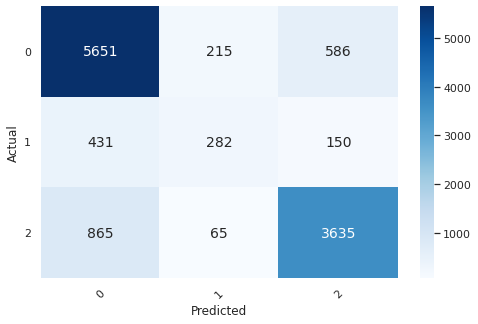

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
rf = RandomForestClassifier(criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=400)

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_test)

# make predictions on test set
y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*10)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))

# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)
print('-'*50)
#feature_importances(best_model,"Random Forest")

In [ ]:
scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 

0.6707495497676785 +/- 0.0015829270268676139


In [ ]:
df_results = df_results.append({       # first trial is written in results 
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'TargetEncoder',
               'balanced_accuracy score mean' : 0.67074,
                    'balanced_accuracy score std' : 0.00158}, ignore_index=True)


# Robust Scaler/ LeaveOneOut Encoder with Random Forest

LeaveOneOut Encoder excludes the row’s target when calculating the mean target for a level to reduce the effect of outliers. It is good for outliers but we have already cleaned most of our outliers. To make sure, we tried this encoder also. 

In [ ]:
scaler = RobustScaler()
encoder = ce.LeaveOneOutEncoder(cols=cat_col)

num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)


preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std())



0.33722263729417423 +/- 0.001025732069190752


In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'LeaveOneOut',
                'balanced_accuracy score mean' : 0.33722,
                    'balanced_accuracy score std' : 0.00102}, ignore_index=True)


LeaveOneOut did not improve target encoding results

# Robust Scaler/ OneHot Encoder with Random Forest

0.6700382357248389 +/- 0.002165376883000215
Accuracy score train: 0.9876260022306866
Accuracy score test: 0.803030303030303
----------
micro avg score train: 0.9876260022306866
micro avg score test: 0.803030303030303
----------
macro avg score train: 0.9775746392625941
macro score test: 0.681469165466165
----------
Balance Accuracy score train: 0.9730823936466337
Balance Accuracy score test: 0.6640190263892162
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6452
           1       0.50      0.32      0.39       863
           2       0.83      0.80      0.81      4565

    accuracy                           0.80     11880
   macro avg       0.71      0.66      0.68     11880
weighted avg       0.80      0.80      0.80     11880

--------------------------------------------------


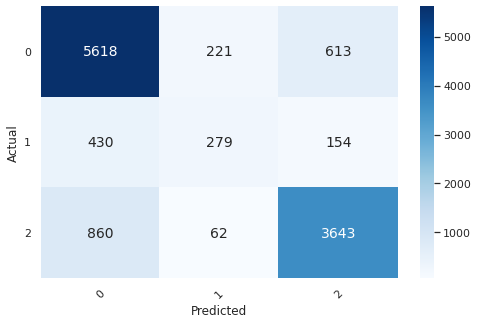

In [ ]:
scaler = RobustScaler()
encoder = ce.OneHotEncoder(cols=cat_col)

num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)


preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std())

pipe.fit(X_train, y_train)

# make predictions on training set
y_pred = pipe.predict(X_test)

# make predictions on test set
y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print('-'*10)
print("macro avg score train: {}".format(f1_score(y_train, y_pred_train,average='macro')))
print("macro score test: {}".format(f1_score(y_test, y_pred, average='macro')))

print('-'*10)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))

# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)
print('-'*50)
#feature_importances(best_model,"Random Forest")


In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'OneHot',
                'balanced_accuracy score mean' : 0.670038,
                    'balanced_accuracy score std' : 0.002165}, ignore_index=True)


one hot encoder dose not work well with high cardinal data that we have 

#Robust Scaler / Label encoder Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 

0.6703974746094209 +/- 0.0036639969110904198


In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'Label encoder',
                'balanced_accuracy score mean' : 0.6703974,
                    'balanced_accuracy score std' : 0.0036639}, ignore_index=True)


#Standerd Scaler / Label encoder Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 



0.6703848281057475 +/- 0.003999068796785815


In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'Label encoder',
                'balanced_accuracy score mean' : 0.67038,
                    'balanced_accuracy score std' : 0.003999}, ignore_index=True)


The result does not change significantly so, we decided our encoder as WoE and scaler as Robust.

# Standerd Scaler/ OrdinalEncoder Encoder with RF


Ordinal encoder is same as label encoder but only differenc is  order is preserved

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoder = ce.OrdinalEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 

0.6702529863576494 +/- 0.0022751089074102807


In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'OrdinalEncoder',
                'balanced_accuracy score mean' : 0.6702529,
                    'balanced_accuracy score std' : 0.002275}, ignore_index=True)


# Robust Scaler/ OrdinalEncoder Encoder with RF

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
encoder = ce.OrdinalEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 

0.6703278561613526 +/- 0.0027025446193240476


In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'OrdinalEncoder',
                'balanced_accuracy score mean' : 0.670327,
                    'balanced_accuracy score std' : 0.0027025}, ignore_index=True)


#Robust Scaler/ Hashing Encoder with Random Forest

A vector of categorical variables gets converted to a higher dimensional space of integers, where the distance between two vectors of categorical variables in approximately maintained the transformed numerical dimensional space. With Feature Hashing, the number of dimensions will be far less than the number of dimensions with simple binary encoding

In [ ]:
from sklearn.preprocessing import StandardScaler
#StandardScaler
scaler = RobustScaler()
encoder = ce.HashingEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 

0.657021198454623 +/- 0.0025262971661000624


In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'HashingEncoder',
                'balanced_accuracy score mean' : 0.657021,
                    'balanced_accuracy score std' : 0.002526}, ignore_index=True)


# MinMax Scaler/ LabelEncoder with random forest


When the distribution is not Gaussian or the standard deviation is very small, the min-max scaler generally works well. So, we will see and compare our scalers.

In [ ]:
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='balanced_accuracy')
print(scores.mean(), "+/-", scores.std()) 

NameError: ignored

In [ ]:
df_results = df_results.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'MinMax' , 
       'Encoder' : 'Label encoder',
                'balanced_accuracy score mean' : 0.67070,
                    'balanced_accuracy score std' : 0.003290}, ignore_index=True)


# Comparing Different Encoder and Scalers

In [ ]:
df_results 

,Model,Scaler,Encoder,balanced_accuracy score mean,balanced_accuracy score std
0,Random Forest,Robust,TargetEncoder,0.670740,0.001580
1,Random Forest,Robust,LeaveOneOut,0.337220,0.001020
2,Random Forest,Robust,OneHot,0.670038,0.002165
3,Random Forest,Robust,Label encoder,0.670397,0.003664
4,Random Forest,StandardScaler,Label encoder,0.670380,0.003999
5,Random Forest,StandardScaler,OrdinalEncoder,0.670253,0.002275
6,Random Forest,RobustScaler,OrdinalEncoder,0.670327,0.002703
7,Random Forest,RobustScaler,HashingEncoder,0.657021,0.002526
8,Random Forest,MinMax,Label encoder,0.670700,0.003290


In [ ]:
df_results.sort_values('balanced_accuracy score mean',ascending=False) 

,Model,Scaler,Encoder,balanced_accuracy score mean,balanced_accuracy score std
0,Random Forest,Robust,TargetEncoder,0.670740,0.001580
8,Random Forest,MinMax,Label encoder,0.670700,0.003290
3,Random Forest,Robust,Label encoder,0.670397,0.003664
4,Random Forest,StandardScaler,Label encoder,0.670380,0.003999
6,Random Forest,RobustScaler,OrdinalEncoder,0.670327,0.002703
5,Random Forest,StandardScaler,OrdinalEncoder,0.670253,0.002275
2,Random Forest,Robust,OneHot,0.670038,0.002165
7,Random Forest,RobustScaler,HashingEncoder,0.657021,0.002526
1,Random Forest,Robust,LeaveOneOut,0.337220,0.001020


#Observaltion
##1. from the results we can  see Robust Scaler with Target Encoder gave us best results but target encoder uses target varibles to encode the data this is good in competition setting but i think in real world it can cause overfitting our models may not generalize well

##2. Second best results we got from minmax scaler with label encoder, robust scaler works well in presence of outlairs but we alrady cleaned our data very well, min max scaler performed better that than standerd scaler because when the distribution is not Gaussian or the standard deviation is very small, the min-max scaler generally works well.

#For further modling  i will use minmax scaler with label encoder


In [ ]:
c = list(X.columns)
c.insert(0,'id')
ids = test_set['id'].copy()
f_test = test_set[c]
f_test.head()

,id,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,50785,other,dmdd,-4.06,Internal,21,1,other,other,never pay,...,35.29,1,Parastatal,1996,321,1,short dry,1,Manyara-3,non-autonomous
1,51630,other,dwe,-3.31,Pangani,2,1,gravity,gravity,never pay,...,36.66,1,VWC,1569,300,13,short dry,1,Arusha-2,non-autonomous
2,17168,other,other,-5.00,Internal,13,1,other,other,never pay,...,34.77,1,VWC,1567,500,3,short dry,1,Singida-2,non-autonomous
3,45559,other,other,-9.42,Ruvuma / Southern Coast,80,1,other,other,unknown,...,38.06,1,VWC,267,250,26,short dry,1,Lindi-43,non-autonomous
4,49871,other,other,-10.95,Ruvuma / Southern Coast,10,1,gravity,gravity,monthly,...,35.01,1,Water Board,1260,60,13,long rain,0,Ruvuma-3,autonomous


#KNN

In [ ]:
df_results_all = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'balanced_accuracy train', 'balanced_accuracy test']) # to see all results

##KNN/ RobustScaler/TargetEncoder

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,50))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['gps_height',
                                                                          'longitude',
                                                                          'latitude',
                                                                          'population',
                                                                          'public_meeting',
                                                                          'age',
                                                                          'permit',
                  

In [ ]:
#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Best Score: 0.6400159741907914
Parameters: {'kneighborsclassifier__n_neighbors': 1}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('targetencoder',
                                                                  

Accuracy score train: 0.985542625055241
Balance Accuracy score train: 0.9737048807355424
Accuracy score test: 0.757996632996633
Balance Accuracy score test: 0.6428074332225369

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6452
           1       0.37      0.35      0.36       863
           2       0.77      0.77      0.77      4565

    accuracy                           0.76     11880
   macro avg       0.65      0.64      0.64     11880
weighted avg       0.76      0.76      0.76     11880



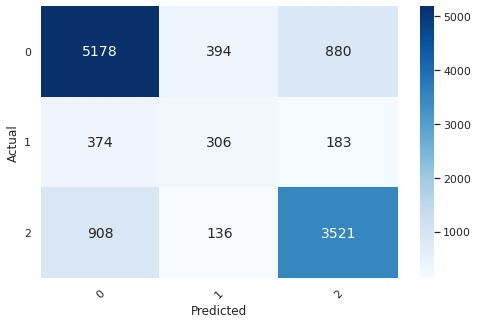

In [ ]:

#score model
knn = KNeighborsClassifier(n_neighbors=1)


scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'TargetEncoder',
               'balanced_accuracy train' : 0.97370,
                    'balanced_accuracy test' : 0.64280}, ignore_index=True)

KNN performs well on rare class compaired to random forest.
knn overfits on trainning data


##KNN - RobustScaler/ Label Encoder

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,50))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
grid_search.fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best Score: 0.6376044908501879
Parameters: {'kneighborsclassifier__n_neighbors': 1}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('my_labelencoder',
 

Accuracy score train: 0.985542625055241
Accuracy score test: 0.7491582491582491
--------------------
Balance Accuracy score train: 0.9737048807355424
Balance Accuracy score test: 0.6344213753727564

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      6452
           1       0.36      0.35      0.35       863
           2       0.76      0.75      0.76      4565

    accuracy                           0.75     11880
   macro avg       0.64      0.63      0.64     11880
weighted avg       0.75      0.75      0.75     11880



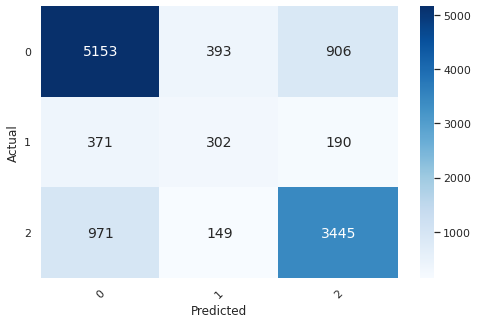

In [ ]:

#score model
knn = KNeighborsClassifier(n_neighbors=1)


scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


this did not improve previous scores

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'Label Encoder',
               'balanced_accuracy train' : 0.973704,
                    'balanced_accuracy test' : 0.63442}, ignore_index=True)

##KNN - MinMaxScaler/ Label Encoder

In [ ]:
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,50))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
grid_search.fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best Score: 0.6384119946090764
Parameters: {'kneighborsclassifier__n_neighbors': 1}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('my_labelencoder',
 

Accuracy score train: 0.985542625055241
Accuracy score test: 0.7491582491582491
--------------------
Balance Accuracy score train: 0.9737048807355424
Balance Accuracy score test: 0.6344213753727564

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      6452
           1       0.36      0.35      0.35       863
           2       0.76      0.75      0.76      4565

    accuracy                           0.75     11880
   macro avg       0.64      0.63      0.64     11880
weighted avg       0.75      0.75      0.75     11880



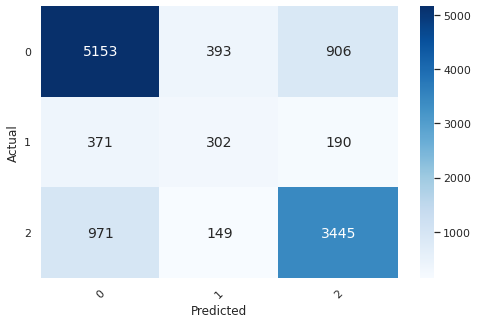

In [ ]:

#score model
knn = KNeighborsClassifier(n_neighbors=1)


scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


did not improve previous results

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'Label Encoder',
               'balanced_accuracy train' : 0.97370,
                    'balanced_accuracy test' : 0.634421}, ignore_index=True)

##KNN - StandardScaler/ Label Encoder

In [ ]:
#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,50))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
grid_search.fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best Score: 0.6376444406364061
Parameters: {'kneighborsclassifier__n_neighbors': 1}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('my_labelencoder

Accuracy score train: 0.985542625055241
Balance Accuracy score train: 0.9737048807355424
Accuracy score test: 0.7499158249158249
Balance Accuracy score test: 0.6346371846571954

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      6452
           1       0.36      0.35      0.35       863
           2       0.76      0.76      0.76      4565

    accuracy                           0.75     11880
   macro avg       0.64      0.63      0.64     11880
weighted avg       0.75      0.75      0.75     11880



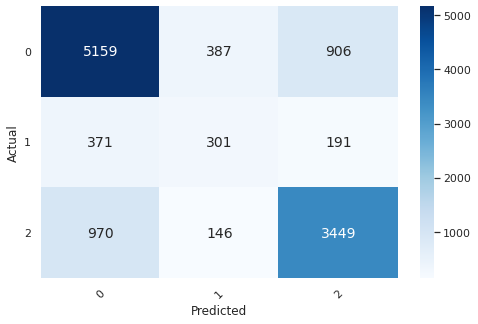

In [ ]:
from sklearn.preprocessing import StandardScaler
#score model
knn = KNeighborsClassifier(n_neighbors=1)


scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


same results as previous one 

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'Label Encoder',
               'balanced_accuracy train' : 0.973704,
                    'balanced_accuracy test' : 0.634637}, ignore_index=True)

#Decision Tree

## RobustScaler/Target encoding

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6309585627515011
Parameters: {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('

In [ ]:
random_search_dt.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder(cols=['funder',
                                                                 

Accuracy score train: 0.8561627980386792
Accuracy score test: 0.7783670033670034
--------------------
Balance Accuracy score train: 0.7439942391054233
Balance Accuracy score test: 0.6322165513198176

              precision    recall  f1-score   support

           0       0.79      0.87      0.82      6452
           1       0.45      0.28      0.35       863
           2       0.81      0.75      0.78      4565

    accuracy                           0.78     11880
   macro avg       0.68      0.63      0.65     11880
weighted avg       0.77      0.78      0.77     11880



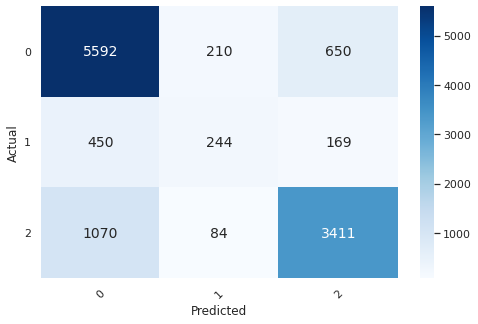

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, criterion = 'gini',random_state=42)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


Decison tree reduced over fitting as compaired to knn

knn worked well on rare class as compaired to decision tree but decision tree worked well on mejority class as compaired to knn


In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results RobustScaler/Label encoding
     "Model": 'Decision Tree' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'Target encoding',
               'balanced_accuracy train' : 0.743994,
                    'balanced_accuracy test' : 0.6322165}, ignore_index=True)

## RobustScaler/Label encoding

In [ ]:
#making pipeline

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6309585627515011
Parameters: {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('

In [ ]:
random_search_dt.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder(cols=['funder',
                                                                 

Accuracy score train: 0.8510911424903723
Accuracy score test: 0.7735690235690236
--------------------
Balance Accuracy score train: 0.7349615919126212
Balance Accuracy score test: 0.6298697620150705

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      6452
           1       0.45      0.29      0.35       863
           2       0.81      0.73      0.77      4565

    accuracy                           0.77     11880
   macro avg       0.68      0.63      0.65     11880
weighted avg       0.77      0.77      0.77     11880



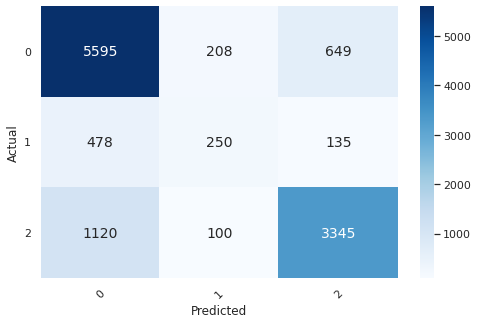

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, criterion = 'gini',random_state=42)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


Decison tree reduced over fitting as compaired to knn

decision tree gave better results that knn 


In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'Decision Tree' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'Label encoding',
               'balanced_accuracy train' : 0.73496,
                    'balanced_accuracy test' : 0.629869}, ignore_index=True)

## MinMaxScaler/Label encoding decision tree

In [ ]:
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.630441257862754
Parameters: {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('c

In [ ]:
random_search_dt.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('my_labelencoder',
                                                                   My_LabelEncoder())]),
                                                  ['funder', 'installer

Accuracy score train: 0.8510911424903723
Accuracy score test: 0.7734006734006734
--------------------
Balance Accuracy score train: 0.7349615919126212
Balance Accuracy score test: 0.6297664348813651

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      6452
           1       0.44      0.29      0.35       863
           2       0.81      0.73      0.77      4565

    accuracy                           0.77     11880
   macro avg       0.68      0.63      0.65     11880
weighted avg       0.77      0.77      0.77     11880



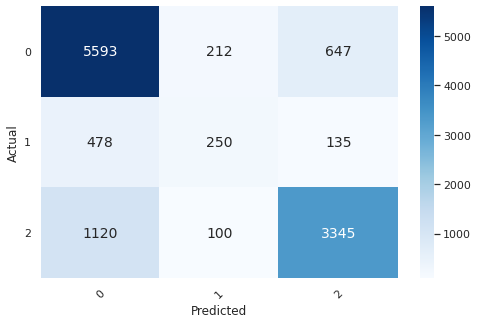

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, criterion = 'gini',random_state=42)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


min max scaler with label encoder did not change the results of roubust scaler withe target encoding both gave very similar results

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'Decision Tree' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'Label encoding',
               'balanced_accuracy train' : 0.734961,
                    'balanced_accuracy test' : 0.629766}, ignore_index=True)

##StanderScaler/ label encoder 

In [ ]:
#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6297671113853928
Parameters: {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                               

Accuracy score train: 0.8510911424903723
Accuracy score test: 0.7739057239057239
--------------------
Balance Accuracy score train: 0.7349615919126212
Balance Accuracy score test: 0.6300977720657562

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      6452
           1       0.45      0.29      0.35       863
           2       0.81      0.73      0.77      4565

    accuracy                           0.77     11880
   macro avg       0.68      0.63      0.65     11880
weighted avg       0.77      0.77      0.77     11880



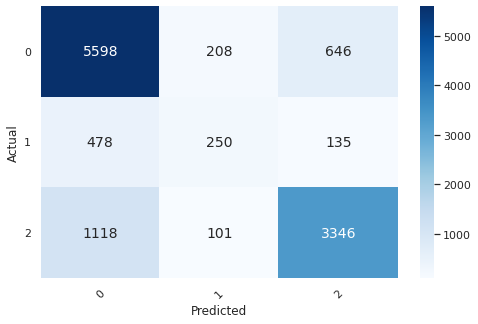

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, criterion = 'gini',random_state=42)

scaler = StandardScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


standerdscaler dit not improve results of  minmax scaler not huge  difference 

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'Decision Tree' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'Label encoding',
               'balanced_accuracy train' : 0.734961,
                    'balanced_accuracy test' : 0.6300977}, ignore_index=True)

# Xgboost

##RobustScaler / TargetEncoder Xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16]}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6671006649760993
Parameters: {'xgbclassifier__n_estimators': 700, 'xgbclassifier__max_depth': 16, 'xgbclassifier__eta': 0.3, 'xgbclassifier__colsample_bytree': 0.5}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 

Accuracy score train: 0.9874997369473263
Accuracy score test: 0.8013468013468014
--------------------
Balance Accuracy score train: 0.9739030243246436
Balance Accuracy score test: 0.665306500921236

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6452
           1       0.47      0.33      0.39       863
           2       0.83      0.80      0.81      4565

    accuracy                           0.80     11880
   macro avg       0.71      0.67      0.68     11880
weighted avg       0.79      0.80      0.80     11880



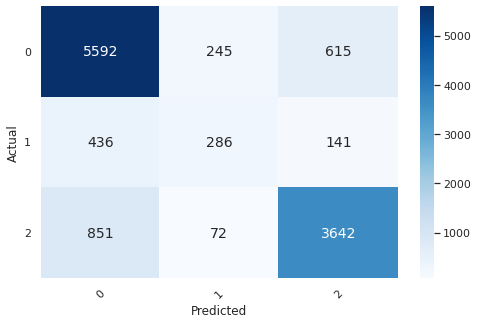

In [ ]:

#score model

xgb = XGBClassifier(n_estimators= 700, max_depth = 16, eta = 0.3, colsample_bytree = 0.5,random_state=42)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


as compaired to decison tree and knn xgb gave better balance accuracy on test data but cearly we can see overfitting here 

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'XGB' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'TargetEncoder',
               'balanced_accuracy train' : 0.9739030,
                    'balanced_accuracy test' : 0.665306}, ignore_index=True)

##RobustScaler / LabelEncoder Xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16]}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6670050591938093
Parameters: {'xgbclassifier__n_estimators': 500, 'xgbclassifier__max_depth': 12, 'xgbclassifier__eta': 0.2, 'xgbclassifier__colsample_bytree': 0.4}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 

In [ ]:
colsample_bytree=0.4, eta=0.2, max_depth=12, n_estimators=500, objective='multi:softprob', 

Accuracy score train: 0.9669395399734843
Accuracy score test: 0.8114478114478114
--------------------
Balance Accuracy score train: 0.9317845563840149
Balance Accuracy score test: 0.6662524621095719

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6452
           1       0.58      0.32      0.41       863
           2       0.85      0.79      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.74      0.67      0.69     11880
weighted avg       0.81      0.81      0.80     11880



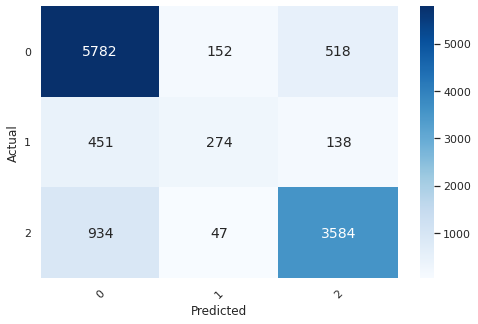

In [ ]:

#score model

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.2, max_depth=12, n_estimators=500, objective='multi:softprob',random_state=42)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


as compaired to when we use robust scaler and target encoding, robust scaling with label encoding emproved that results and less overfitting than previous model

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results 
     "Model": 'XGB' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'LabelEncoder',
               'balanced_accuracy train' : 0.9739030,
                    'balanced_accuracy test' : 0.666252}, ignore_index=True)

##MinMaxScaler / LabelEncoder Xgb

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16]}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6696889495560516
Parameters: {'xgbclassifier__n_estimators': 500, 'xgbclassifier__max_depth': 16, 'xgbclassifier__eta': 0.5, 'xgbclassifier__colsample_bytree': 0.4}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 

Accuracy score train: 0.9832277615269681
Accuracy score test: 0.8101851851851852
--------------------
Balance Accuracy score train: 0.9647925522408124
Balance Accuracy score test: 0.6696562436578666

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6452
           1       0.53      0.33      0.41       863
           2       0.84      0.79      0.82      4565

    accuracy                           0.81     11880
   macro avg       0.73      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



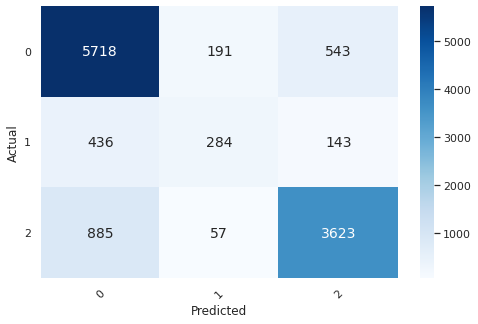

In [ ]:
#score model

xgb = XGBClassifier(n_estimators= 500, max_depth = 16, eta = 0.5, colsample_bytree = 0.4,random_state=42)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


minmax scaler with label encoder improved previous results overfitting is reduced and better balanced accuracy is achived on test data that previous encodings

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results
     "Model": 'XGB' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'LabelEncoder',
               'balanced_accuracy train' : 0.9647925,
                    'balanced_accuracy test' : 0.669656}, ignore_index=True)

##StandardScaler / LabelEncoder Xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16]}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6697405376857106
Parameters: {'xgbclassifier__n_estimators': 300, 'xgbclassifier__max_depth': 16, 'xgbclassifier__eta': 0.1, 'xgbclassifier__colsample_bytree': 0.3}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                             

In [ ]:
colsample_bytree=0.4, eta=0.2, max_depth=12, n_estimators=500, objective='multi:softprob', 

Accuracy score train: 0.9723479029440856
Accuracy score test: 0.8131313131313131
--------------------
Balance Accuracy score train: 0.9422171150169594
Balance Accuracy score test: 0.6659972077939001

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6452
           1       0.58      0.31      0.41       863
           2       0.85      0.79      0.82      4565

    accuracy                           0.81     11880
   macro avg       0.74      0.67      0.69     11880
weighted avg       0.81      0.81      0.81     11880



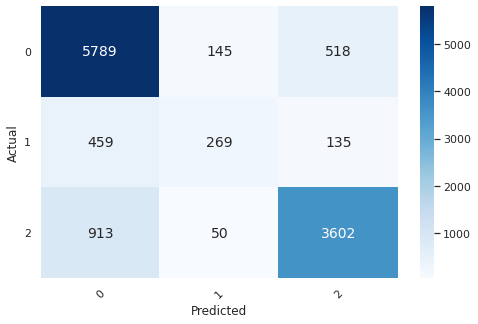

In [ ]:

#score model

xgb = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=16, n_estimators=300, objective='multi:softprob',random_state=42)

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


Standerd scaler did not improve test balanced accuracy but it reduced overfitting than previous model 

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'XGB' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'LabelEncoder',
               'balanced_accuracy train' : 0.942217,
                    'balanced_accuracy test' : 0.665997}, ignore_index=True)

0.8152

In [ ]:
#score model

xgb = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=16, n_estimators=300, objective='multi:softprob',random_state=42)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.9670196467954006

Balanced Accuracy:
TRAIN: 0.9289807248730094


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/xgb_minmax4.csv',index=False)

dd = pd.read_csv('/content/xgb_minmax4.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Bagging

##Robust Scaler/ Target Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
bagg = BaggingClassifier()

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,bagg)

param_grid = { 'baggingclassifier__n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'baggingclassifier__max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}


random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.5113036351717594
Parameters: {'baggingclassifier__n_estimators': 1200, 'baggingclassifier__max_samples': 100, 'baggingclassifier__max_features': 13}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
        

Accuracy score train: 0.7337906942486163
Accuracy score test: 0.7383838383838384
--------------------
Balance Accuracy score train: 0.5130785035976637
Balance Accuracy score test: 0.5170038888575776

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      6452
           1       0.00      0.00      0.00       863
           2       0.78      0.65      0.71      4565

    accuracy                           0.74     11880
   macro avg       0.50      0.52      0.50     11880
weighted avg       0.69      0.74      0.71     11880



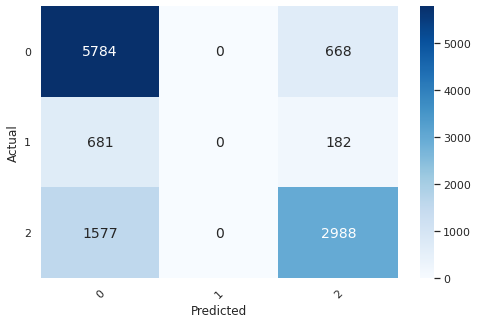

In [ ]:

#score model
bagg = BaggingClassifier(max_features=13, max_samples=100, n_estimators=1200 , random_state=42)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,bagg)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


##Robust Scaler/ Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = RobustScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
bag  =      BaggingClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,bagg)

param_grid = { 'baggingclassifier__n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'baggingclassifier__max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}



random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.48573199883539003
Parameters: {'baggingclassifier__n_estimators': 200, 'baggingclassifier__max_features': 0.4}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                              

Accuracy score train: 0.7098002904101517
Accuracy score test: 0.7160774410774411
--------------------
Balance Accuracy score train: 0.48678107219918143
Balance Accuracy score test: 0.49242159417130843

              precision    recall  f1-score   support

           0       0.68      0.93      0.79      6452
           1       0.00      0.00      0.00       863
           2       0.83      0.54      0.65      4565

    accuracy                           0.72     11880
   macro avg       0.50      0.49      0.48     11880
weighted avg       0.69      0.72      0.68     11880



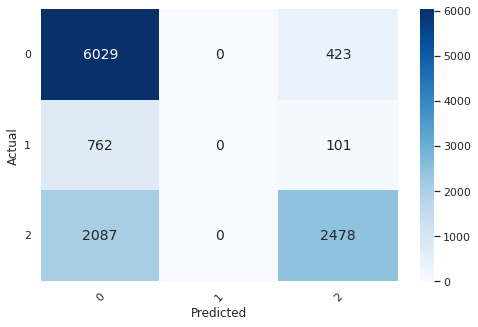

In [ ]:

#score model
bagg = BaggingClassifier(max_features=0.4, max_samples=50,
                                   n_estimators=200, random_state=42)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,bagg)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


bagging misclassified all class 1 


In [ ]:
from sklearn.ensemble import BaggingClassifier

param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}

#Create a based model
bag  =      BaggingClassifier( random_state=42, )

grid_search_bag = RandomizedSearchCV(estimator = bag, param_distributions = param_grid, cv =5, n_iter = 45,
                               verbose = 2, scoring = 'accuracy')

#fitmodel
grid_search_bag.fit(X_train, y_train )

#print best parameters 
print('Best Score:', grid_search_bag.best_score_)
print('Parameters:', grid_search_bag.best_params_)
print('Best Model:',grid_search_bag .best_estimator_)

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'XGB' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'LabelEncoder',
               'balanced_accuracy train' : 0.942217,
                    'balanced_accuracy test' : 0.665997}, ignore_index=True)

#light gbm

##Robust Scaler / Target Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6498752195618891
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__reg_lambda': 1.1, 'lgbmclassifier__reg_alpha': 1.3, 'lgbmclassifier__num_leaves': 200, 'lgbmclassifier__n_estimators': 400, 'lgbmclassifier__min_split_gain': 0.3, 'lgbmclassifier__max_depth': 20, 'lgbmclassifier__colsample_bytree': 0.8}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',

Accuracy score train: 0.8530061659546707
Accuracy score test: 0.8066498316498316
--------------------
Balance Accuracy score train: 0.7178753380592524
Balance Accuracy score test: 0.6441437819888335

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.64      0.26      0.37       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.81      0.80     11880



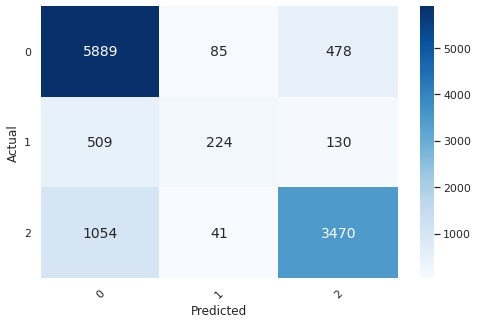

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=20,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=200, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


light gbm worked very well on class 0 as compaired to xgb also overfitting is reduced significantly

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LBGM' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'TargetEncoder',
               'balanced_accuracy train' : 0.717875,
                    'balanced_accuracy test' : 0.644143}, ignore_index=True)

##Robust Scaler / Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = RobustScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6506468846073261
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.7, 'lgbmclassifier__reg_lambda': 1.3, 'lgbmclassifier__reg_alpha': 1.3, 'lgbmclassifier__num_leaves': 200, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__min_split_gain': 0.3, 'lgbmclassifier__max_depth': 12, 'lgbmclassifier__colsample_bytree': 0.8}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit'

Accuracy score train: 0.852964077526884
Accuracy score test: 0.8047979797979798
--------------------
Balance Accuracy score train: 0.7156705922192231
Balance Accuracy score test: 0.6427082025522233

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6452
           1       0.63      0.26      0.37       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



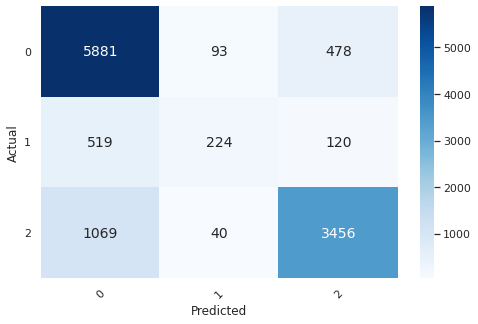

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=12,
                                min_split_gain=0.3, n_estimators=1000,
                                num_leaves=200, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.3, subsample=0.7,
                                subsample_freq=20)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


label encoder  further reduced overfitting

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LGBM' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'LabelEncoder',
               'balanced_accuracy train' : 0.7156705,
                    'balanced_accuracy test' : 0.642708}, ignore_index=True)

##MinMax Scaler / Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6490089636407589
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.7, 'lgbmclassifier__reg_lambda': 1.1, 'lgbmclassifier__reg_alpha': 1.1, 'lgbmclassifier__num_leaves': 100, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_split_gain': 0.3, 'lgbmclassifier__max_depth': 25, 'lgbmclassifier__colsample_bytree': 0.8}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',

Accuracy score train: 0.8484185273259117
Accuracy score test: 0.8043771043771044
--------------------
Balance Accuracy score train: 0.7121968438530489
Balance Accuracy score test: 0.6424925962845102

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6452
           1       0.63      0.26      0.37       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



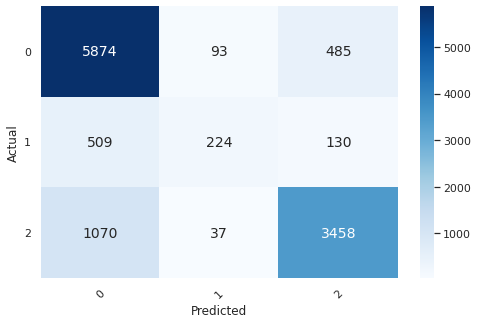

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


min maxscaler reduced overfitting more than robustscaler

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LGBM' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'LabelEncoder',
               'balanced_accuracy train' : 0.712196,
                    'balanced_accuracy test' : 0.642492}, ignore_index=True)

##Standard Scaler / Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6488379760543634
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__reg_lambda': 1.1, 'lgbmclassifier__reg_alpha': 1.2, 'lgbmclassifier__num_leaves': 200, 'lgbmclassifier__n_estimators': 700, 'lgbmclassifier__min_split_gain': 0.3, 'lgbmclassifier__max_depth': 20, 'lgbmclassifier__colsample_bytree': 0.7}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'perm

Accuracy score train: 0.8527325911740566
Accuracy score test: 0.8053030303030303
--------------------
Balance Accuracy score train: 0.7150838593114361
Balance Accuracy score test: 0.6425198583188693

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.64      0.26      0.37       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.81      0.79     11880



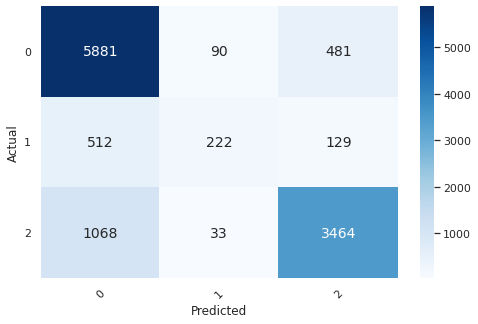

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.7, max_depth=20,
                                min_split_gain=0.3, n_estimators=700,
                                num_leaves=200, random_state=42, reg_alpha=1.2,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20)

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


Standerd Scaler did not improve results 

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LGBM' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'LabelEncoder',
               'balanced_accuracy train' : 0.715083,
                    'balanced_accuracy test' : 0.642519}, ignore_index=True)

#Random Forest

##Robust Scaler/ Target Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier())])

param_grid = {'classiffier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'classiffier__max_features': ['sqrt','log2'],
              "classiffier__criterion": ["gini", "entropy"],
              'classiffier__min_samples_leaf': [1, 2, 4],
              'classiffier__min_samples_split': [2, 5, 10,15],
              'classiffier__n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6686666352805614
Parameters: {'classiffier__n_estimators': 400, 'classiffier__min_samples_split': 2, 'classiffier__min_samples_leaf': 1, 'classiffier__max_features': 'log2', 'classiffier__max_depth': 40, 'classiffier__criterion': 'gini'}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                 

Accuracy score train: 0.9875839138028999
Accuracy score test: 0.8043771043771044
--------------------
Balance Accuracy score train: 0.9732184005647347
Balance Accuracy score test: 0.6641907207593962

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6452
           1       0.50      0.32      0.39       863
           2       0.83      0.79      0.81      4565

    accuracy                           0.80     11880
   macro avg       0.71      0.66      0.68     11880
weighted avg       0.80      0.80      0.80     11880



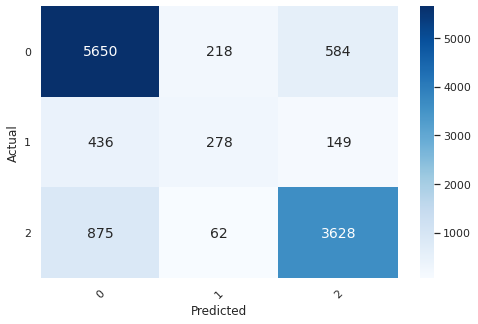

In [ ]:

#score model
rf = RandomForestClassifier(max_depth=40, max_features='log2',
                                        n_estimators=400)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


random forest with target encoding is overfitting on our data set 

In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'TargetEncoder',
               'balanced_accuracy train' : 0.973218,
                    'balanced_accuracy test' : 0.664190}, ignore_index=True)

## MinMax Scaler / label Encoding

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scaler = MinMaxScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier())])

param_grid = {'classiffier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'classiffier__max_features': ['sqrt','log2'],
              "classiffier__criterion": ["gini", "entropy"],
              'classiffier__min_samples_leaf': [1, 2, 4],
              'classiffier__min_samples_split': [2, 5, 10,15],
              'classiffier__n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'balanced_accuracy')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.6667985866747719
Parameters: {'classiffier__n_estimators': 200, 'classiffier__min_samples_split': 2, 'classiffier__min_samples_leaf': 1, 'classiffier__max_features': 'log2', 'classiffier__max_depth': 80, 'classiffier__criterion': 'entropy'}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                              

Accuracy score train: 0.9875839138028999
Accuracy score test: 0.8045454545454546
--------------------
Balance Accuracy score train: 0.9730458799722627
Balance Accuracy score test: 0.6649988247782561

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6452
           1       0.51      0.33      0.40       863
           2       0.83      0.79      0.81      4565

    accuracy                           0.80     11880
   macro avg       0.72      0.66      0.68     11880
weighted avg       0.80      0.80      0.80     11880



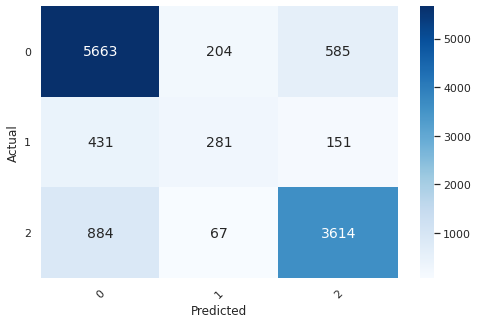

In [ ]:

#score model
rf = RandomForestClassifier(criterion='entropy', max_depth=80,
                                        max_features='log2',
                                        n_estimators=200)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
df_results_all = df_results_all.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'TargetEncoder',
               'balanced_accuracy train' : 0.9730458,
                    'balanced_accuracy test' : 0.664998}, ignore_index=True)

In [ ]:
df_results_all

,Model,Scaler,Encoder,balanced_accuracy train,balanced_accuracy test
0,KNN,Robust,TargetEncoder,0.973700,0.642800
1,KNN,Robust,Label Encoder,0.973704,0.634420
2,KNN,MinMaxScaler,Label Encoder,0.973700,0.634421
3,KNN,StandardScaler,Label Encoder,0.973704,0.634637
4,Decision Tree,RobustScaler,Target encoding,0.743994,0.632216
5,Decision Tree,RobustScaler,Label encoding,0.734960,0.629869
6,Decision Tree,MinMaxScaler,Label encoding,0.734961,0.629766
7,Decision Tree,MinMaxScaler,Label encoding,0.734961,0.630098
8,XGB,RobustScaler,TargetEncoder,0.973903,0.665306
9,XGB,RobustScaler,LabelEncoder,0.973903,0.666252


#Voting 0.7993

In [ ]:
# lightbgm min max
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20)

# xgb min max

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.5, max_depth=16,
                               n_estimators=500, objective='multi:softprob')

#decision tree min max

dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, criterion = 'gini',random_state=42)

#knn
knn = KNeighborsClassifier(n_neighbors=1)

# Random Forest
rf = RandomForestClassifier(criterion='entropy', max_depth=80,
                                        max_features='log2',
                                        n_estimators=200)

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm', lgbm), ('xgb', xgb), ('dt', dt), ('knn', knn), ('rf', rf)], voting = 'soft')
 

Accuracy score train: 0.9842799722216377
Accuracy score test: 0.809006734006734
--------------------
Balance Accuracy score train: 0.9658296199942175
Balance Accuracy score test: 0.6695807698393251

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      6452
           1       0.53      0.33      0.41       863
           2       0.83      0.79      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.73      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



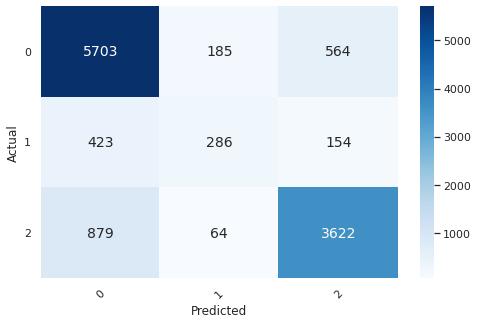

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm', lgbm), ('xgb', xgb), ('dt', dt), ('knn', knn), ('rf', rf)], voting = 'soft')
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
#score model
vc = VotingClassifier([('lgbm', lgbm), ('xgb', xgb), ('dt', dt), ('knn', knn), ('rf', rf)], voting = 'soft')
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.9815148403171771

Balanced Accuracy:
TRAIN: 0.9607734730939037


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/voting.csv',index=False)

dd = pd.read_csv('/content/voting.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#Stacking 0.8139

In [ ]:
xgb = XGBClassifier(colsample_bytree=0.3, eta=0.1, max_depth=16, n_estimators=300, objective='multi:softprob',random_state=42)

rf = RandomForestClassifier(criterion='entropy', max_depth=80,
                                        max_features='log2',
                                        n_estimators=200)

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20)

Accuracy score train: 0.9326374713272586
Accuracy score test: 0.8170875420875421
--------------------
Balance Accuracy score train: 0.8173198697264569
Balance Accuracy score test: 0.6576189726909315

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      6452
           1       0.65      0.27      0.38       863
           2       0.85      0.79      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.66      0.69     11880
weighted avg       0.81      0.82      0.81     11880



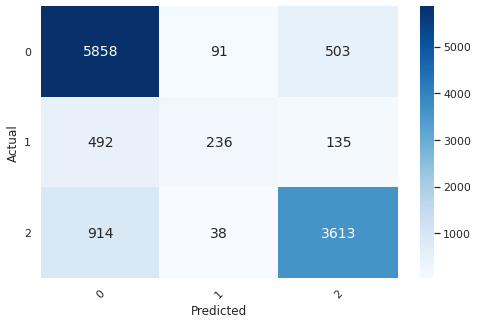

In [ ]:
#machine learning
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('rf', rf), 
                              ('xgb', xgb),
                            ('lgbm',lgbm),], final_estimator=LogisticRegression())


scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,stack)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


stacking best performing models together gave best results

In [ ]:
#score model
stack = StackingClassifier([('rf', rf), 
                              ('xgb', xgb),
                            ('lgbm',lgbm),], final_estimator=LogisticRegression())
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,stack)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.9335342345830738

Balanced Accuracy:
TRAIN: 0.82038586959308


In [53]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Stacking3.csv',index=False)

dd = pd.read_csv('/content/Stacking3.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


Accuracy score train: 0.8462088848671058
Accuracy score test: 0.8043771043771044
--------------------
Balance Accuracy score train: 0.711199597453121
Balance Accuracy score test: 0.6440516405377452

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6452
           1       0.63      0.27      0.38       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



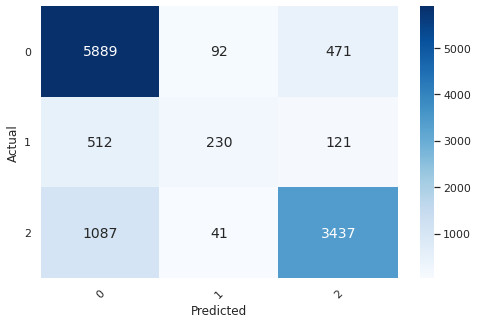

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20)
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.8459233320426269

Balanced Accuracy:
TRAIN: 0.7095945060628672


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/LGBM.csv',index=False)

dd = pd.read_csv('/content/LGBM.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# Weighted Voting 0.7993

In [ ]:
# lightbgm min max
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20)

# xgb min max

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.5, max_depth=16,
                               n_estimators=500, objective='multi:softprob')

#decision tree min max

dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, criterion = 'gini',random_state=42)

#knn
knn = KNeighborsClassifier(n_neighbors=1)

# Random Forest
rf = RandomForestClassifier(criterion='entropy', max_depth=80,
                                        max_features='log2',
                                        n_estimators=200)

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm', lgbm), ('xgb', xgb), ('rf', rf)], voting = 'soft', weights = [0.85, 1, 1])
 


Accuracy score train: 0.9874366043056462
Accuracy score test: 0.8079124579124579
--------------------
Balance Accuracy score train: 0.9719718890758643
Balance Accuracy score test: 0.663320854648847

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6452
           1       0.52      0.31      0.39       863
           2       0.84      0.79      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.72      0.66      0.68     11880
weighted avg       0.80      0.81      0.80     11880



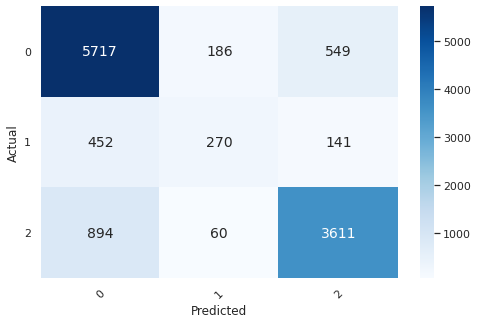

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm', lgbm), ('xgb', xgb), ('rf', rf)], voting = 'soft', weights = [0.85, 1, 1])
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
#score model
vc = VotingClassifier([('lgbm', lgbm), ('xgb', xgb), ('rf', rf)], voting = 'soft', weights = [0.85, 1, 1])
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.9859593595851782

Balanced Accuracy:
TRAIN: 0.9682262294603202


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/votingWeight2.csv',index=False)

dd = pd.read_csv('/content/votingWeight2.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#lgbm voting

In [ ]:
# lightbgm min max
lgbm1 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20,ramdom_state = 42)

lgbm2 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20,ramdom_state = 85)
lgbm3 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20,ramdom_state = 26)
lgbm4 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20,ramdom_state = 154)
lgbm5 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=200,
                                num_leaves=100, random_state=42, reg_alpha=1.1,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20,ramdom_state = 76)



In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3), ('lgbm4', lgbm4), ('lgbm5', lgbm5)], voting = 'soft')
 

Accuracy score train: 0.8462088848671058
Accuracy score test: 0.8043771043771044
--------------------
Balance Accuracy score train: 0.711199597453121
Balance Accuracy score test: 0.6440516405377452

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6452
           1       0.63      0.27      0.38       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



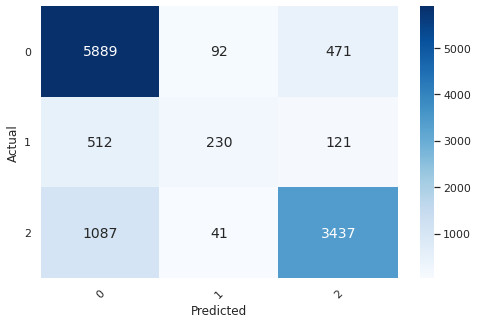

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3), ('lgbm4', lgbm4), ('lgbm5', lgbm5)], voting = 'soft')
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
#score model

vc = VotingClassifier([('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3), ('lgbm4', lgbm4), ('lgbm5', lgbm5)], voting = 'soft')


scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.8459233320426269

Balanced Accuracy:
TRAIN: 0.7095945060628672


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/voting_lgbm.csv',index=False)

dd = pd.read_csv('/content/voting_lgbm.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


#TPOT

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

X_encoded = pd.DataFrame(preprocessor.fit_transform(X,y))

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, test_size = 0.2, random_state=42 , stratify=y)

##xgb balanced_accuracy 0.8114

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 600, 700,],
              'colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'eta': [0.1,0.2,0.3,0.4,0.5],
             'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16]}

In [ ]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'xgboost.XGBClassifier': param_grid}, 
                                 cv = 4, scoring = 'balanced_accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7718322101584776

Generation 2 - Current best internal CV score: 0.7718322101584776

Generation 3 - Current best internal CV score: 0.7718322101584776

Generation 4 - Current best internal CV score: 0.7718322101584776

Generation 5 - Current best internal CV score: 0.7718322101584776

Best pipeline: XGBClassifier(XGBClassifier(input_matrix, colsample_bytree=0.3, eta=0.4, max_depth=14, n_estimators=100), colsample_bytree=0.4, eta=0.3, max_depth=1, n_estimators=500)


TPOTClassifier(config_dict={'xgboost.XGBClassifier': {'colsample_bytree': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5],
                                                      'eta': [0.1, 0.2, 0.3,
                                                              0.4, 0.5],
                                                      'max_depth': [1, 2, 4, 6,
                                                                    8, 10, 12,
                                                                    14, 16],
                                                      'n_estimators': [100, 200,
                                                                       300, 400,
                                                   

Accuracy score train: 0.9661609040594289
Accuracy score test: 0.8111111111111111
--------------------
Balance Accuracy score train: 0.9325319417078637
Balance Accuracy score test: 0.6645152259542679

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6452
           1       0.56      0.31      0.40       863
           2       0.84      0.79      0.82      4565

    accuracy                           0.81     11880
   macro avg       0.74      0.66      0.69     11880
weighted avg       0.80      0.81      0.80     11880



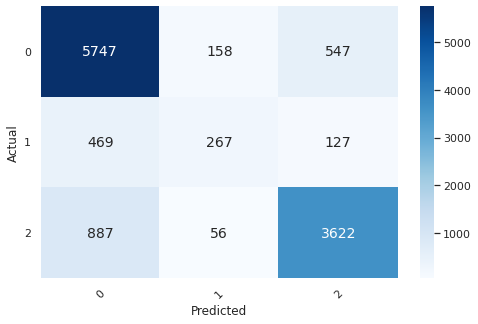

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

xgb = XGBClassifier( colsample_bytree=0.3, eta=0.4, max_depth=14, n_estimators=100)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
#score model
xgb = XGBClassifier( colsample_bytree=0.3, eta=0.4, max_depth=14, n_estimators=100)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.9591743968753683

Balanced Accuracy:
TRAIN: 0.9166341972119527


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)

finalsub = pd.concat([id,sub],axis = 1)

finalsub.to_csv('/content/xgb_tpot.csv',index=False)

dd = pd.read_csv('/content/xgb_tpot.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [ ]:
grid_p = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt','log2'],
 "criterion": ["gini", "entropy"],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

In [ ]:
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': grid_p}, 
                                 cv = 4, scoring = 'balanced_accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -inf


ValueError: ignored

Accuracy score train: 0.9150655527262779
Accuracy score test: 0.8147306397306397
--------------------
Balance Accuracy score train: 0.8070079171074361
Balance Accuracy score test: 0.6568843123233536

--------------------
micro avg score train: 0.9150655527262779
micro avg score test: 0.8147306397306397
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.64      0.28      0.39       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.66      0.69     11880
weighted avg       0.81      0.81      0.80     11880



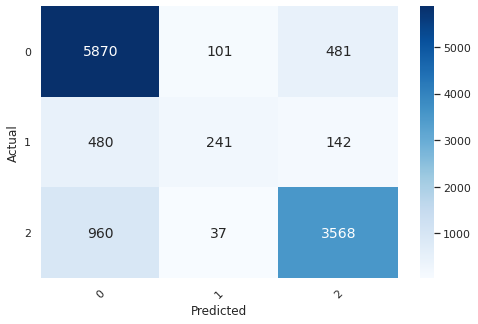

In [ ]:

#score model
rf = RandomForestClassifier(criterion='gini', max_depth=50, max_features='log2',
                       min_samples_leaf=2, min_samples_split=2, n_estimators=400)


scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.9137695920806748

Balanced Accuracy:
TRAIN: 0.8051754340586917


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/tpot_Rf.csv',index=False)

dd = pd.read_csv('/content/tpot_Rf.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional
